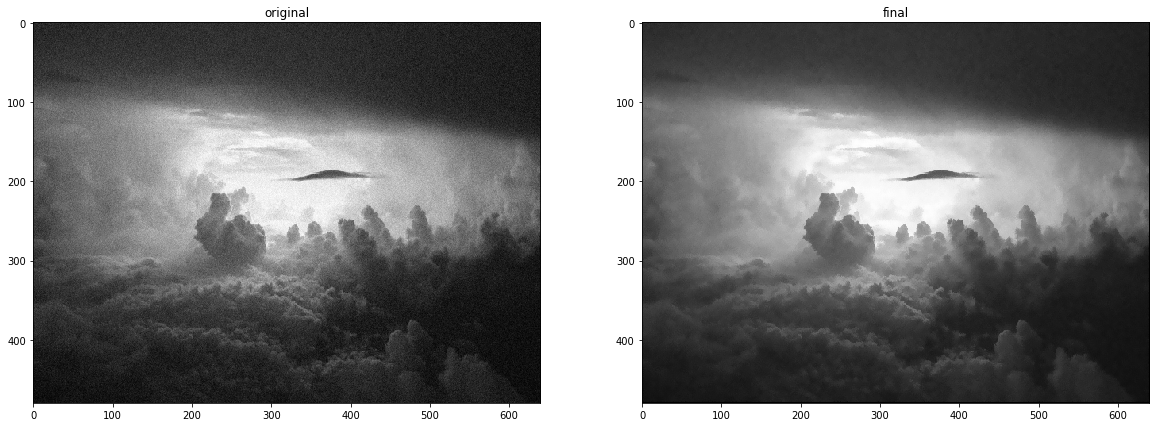

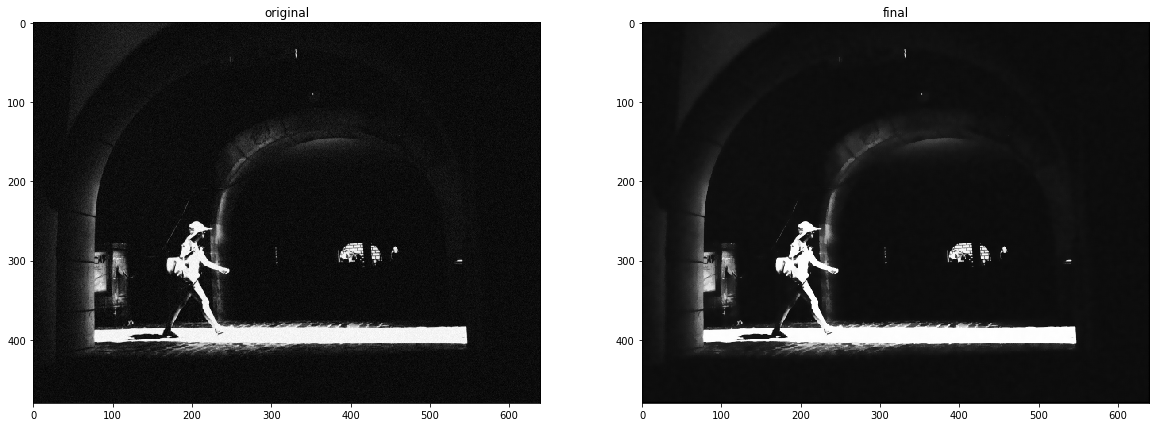

In [4]:
import cv2 
import matplotlib.pyplot as plt 
from math import exp
import numpy as np 
import sys

def bilateral_l(im,vard,varr,filt_size):
    h = im.shape[0]
    w = im.shape[1]
#     print(h,w)
#     img = np.pad(img,(7//2,7//2),mode='constant')
    output = np.zeros((h,w))
    pad = filt_size//2
    pad_im = np.zeros((h+2*pad,w+2*pad))
    pad_im[pad:h+pad,pad:w+pad] = im
    new_h = pad_im.shape[0]
    new_w = pad_im.shape[1]

    
    for i in range(new_h-filt_size):
        for j in range(new_w-filt_size):
#             print(i,j)
            im_part=pad_im[i:i+filt_size,j:j+filt_size]
            cent_x=filt_size//2
            cent_y=filt_size//2
#             for k in range():
#                 for l in range():
            w = np.ones((filt_size,filt_size))
            a = np.arange(-(filt_size//2),(filt_size//2)+1)
            repeat_wind_row = np.tile(a,(filt_size,1))
            repeat_wind_col = np.transpose(repeat_wind_row)
            
            range_f = np.zeros((filt_size,filt_size))
            domain_f = np.zeros((filt_size,filt_size))
            
            s = np.full((filt_size,filt_size),im_part[cent_x,cent_y])
#             print(filt_size)
#             t = 
#             print(np.shape(range_f[0:filt_size-1,0:filt_size-1]))    
#             print((im_part[0:filt_size-1,0:filt_size-1] - s[0:filt_size-1,0:filt_size-1])**2)
#             print(np.exp(-((im_part[0:filt_size,0:filt_size] - s[0:filt_size,0:filt_size])**2)/(2*(varr**2))))
            
            range_f[0:filt_size,0:filt_size] = np.exp(-((im_part[0:filt_size,0:filt_size] - s[0:filt_size,0:filt_size])**2)/(2*(varr**2)))
            domain_f[0:filt_size,0:filt_size] = np.exp(-((repeat_wind_col[0:filt_size,0:filt_size])**2 + (repeat_wind_row[0:filt_size,0:filt_size])**2)/(2*(vard**2)))
            
            
            w = np.multiply(domain_f,range_f)    
            num = np.sum(np.multiply(im_part,w)) 
            den = np.sum(w)
            output[i,j] = num/den
            
    return output




sky = cv2.imread('../input/sky.png',0)
noir = cv2.imread('../input/noir.png',0)
final_sky = bilateral_l(sky,10,12,7)
final_noir = bilateral_l(noir,60,15,7)

# cv2.normalize(final_sky,final_sky, 0, 255, cv2.NORM_MINMAX)
# final_sky = final_sky.astype('uint8')

# cv2.normalize(final_noir,final_noir, 0, 255, cv2.NORM_MINMAX)
# final_noir = final_noir.astype('uint8')


plt.figure(figsize = (20,20))
plt.subplot(1,2,1)

plt.imshow(sky,'gray')
plt.title('original')
plt.subplot(1,2,2)
# plt.figure(figsize = (20,20))
plt.imshow(final_sky,'gray')
plt.title('final')
plt.show()

plt.figure(figsize = (20,20))
plt.subplot(1,2,1)

plt.imshow(noir,'gray')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(final_noir,'gray')
plt.title('final')
plt.show()


In [ ]:

sky_gt = cv2.imread('../input/gt_sky.png',0)
noir_gt = cv2.imread('../input/gt_noir.png',0)

for sigma_d in range(10,180):
    for sigma_r in range(10,180):
        sky_B = bilateral_l(sky,sigma_d,sigma_r,7)
        l2_dist = np.sum((sky_gt- sky_B)**2)

result = np.where(l2_dist == np.amin(l2_dist))
print('List of sigmad,sigmar of minimum dist  : ')
listOfCordinates = list(zip(result[0], result[1]))
for cord in listOfCordinates:
    print(cord)

for sigma_d in range(10,180):
    for sigma_r in range(10,180):
        noir_B = bilateral_l(noir,sigma_d,sigma_r,7)
        l2_dist = np.sum((noir_gt- noir_B)**2)

result = np.where(l2_dist == np.amin(l2_dist))
print('List of sigmad,sigmar of minimum dist  : ')
listOfCordinates = list(zip(result[0], result[1]))
for cord in listOfCordinates:
    print(cord)
    


It is found that the distance is minimum for sky: sigma_D =10  sigma_r=12
w
It is found that the distance is minimum for noir: sigma_D = 60 sigma_r=15

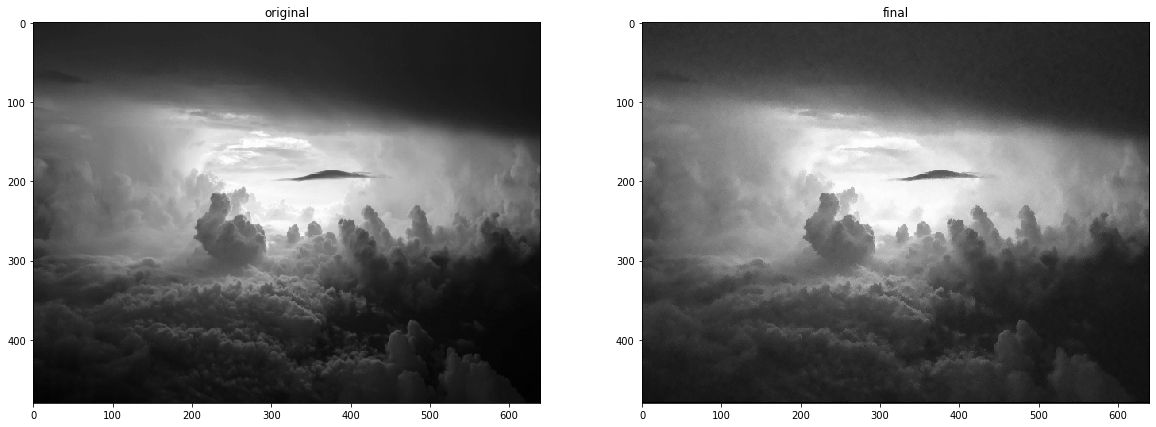

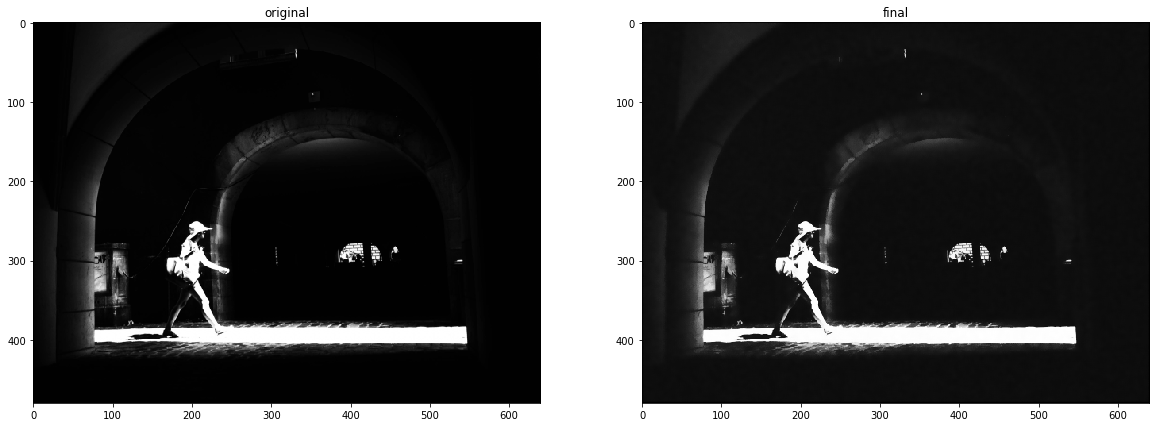

In [5]:
#display images
plt.figure(figsize = (20,20))
plt.subplot(1,2,1)

plt.imshow(sky_gt,'gray')
plt.title('original')
plt.subplot(1,2,2)
# plt.figure(figsize = (20,20))
plt.imshow(final_sky,'gray')
plt.title('final')
plt.show()

plt.figure(figsize = (20,20))
plt.subplot(1,2,1)

plt.imshow(noir_gt,'gray')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(final_noir,'gray')
plt.title('final')
plt.show()
